Project Scenario:
You are a data scientist in an epidemology department.

The governtment is waging a war on diabetes, and you are at the frontline. Your weapon is your Python skills, and you bullets are data.

In this project, you will train a machine learning model to predict whether an individual is ate risk of getting diabetes.

# Part 2: Data Visualization and Statistics

In [2]:
# importing libraries once again
import pandas as pd     # Used to import csv file and create dataframe

# Used for visualisation using plots and graphs
import seaborn as sns
import matplotlib.pyplot as plt

# import stats libraries
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest

In [3]:
# Read our csv into a DataFrame
df = pd.read_csv("diabetes_data_clean.csv")
df

,age,ismale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


(array([  1.,  44.,  83., 103.,  91., 118.,  46.,  29.,   1.,   4.]),
 array([16. , 23.4, 30.8, 38.2, 45.6, 53. , 60.4, 67.8, 75.2, 82.6, 90. ]),
 <a list of 10 Patch objects>)

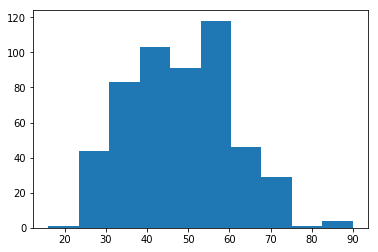

In [5]:
# let's examine age with a histogram
# This is why we imported matplotlib:
plt.hist(df["age"])

In [6]:
df['age'].mean()

48.02884615384615

In [7]:
df['age'].median()

47.5

As you can see, we can access the data of a certain column as such:
- data_frame["column_name"]

So far we have used it to find median/mean and plot a graph

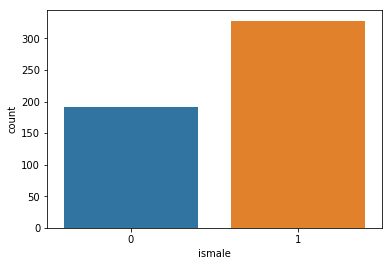

In [14]:
# Create a countplot for ismale using sns (seaborn)
sns.countplot(df["ismale"])

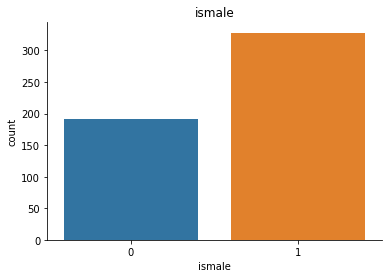

In [18]:
sns.countplot(df["ismale"])
plt.title('ismale')  # Creates a title
sns.despine() # Removes the box and other stuff, always put last

Now we have learnt how to create graphs to help us visualise, we can do it for the rest of our columns. Instead of doing this manually 1 by 1, we can create a for loop to create a graph for each of the columns

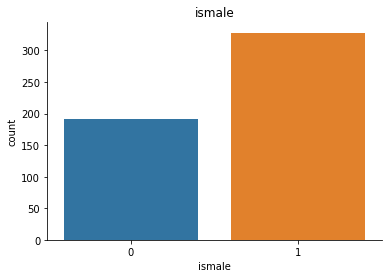

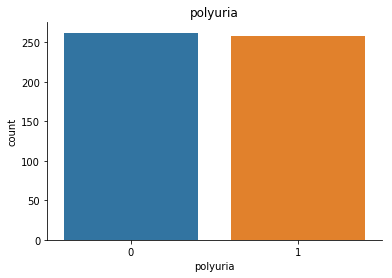

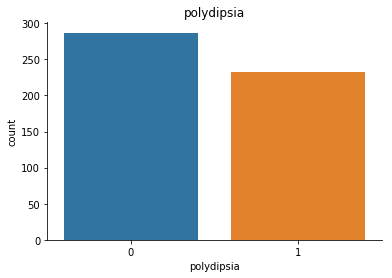

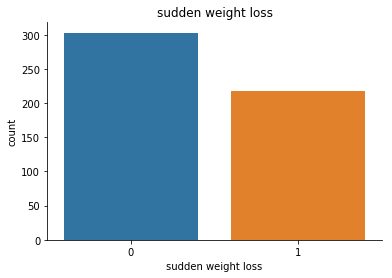

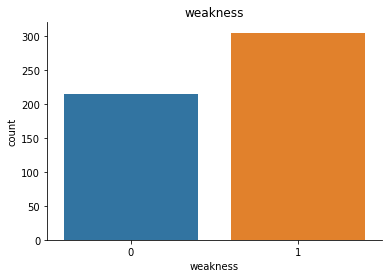

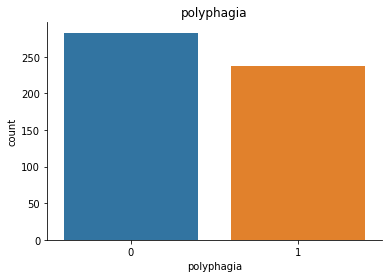

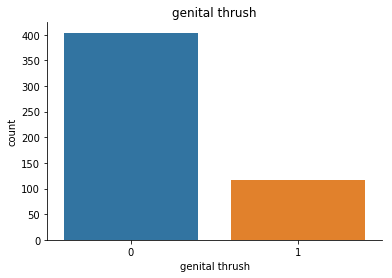

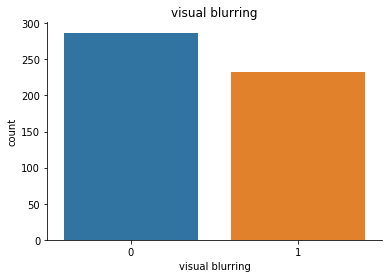

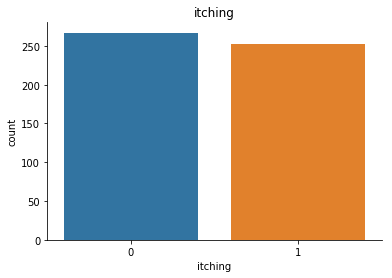

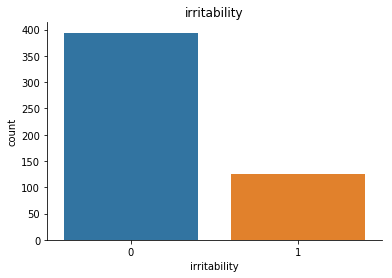

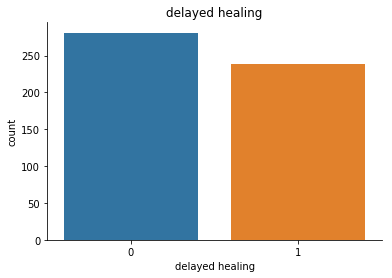

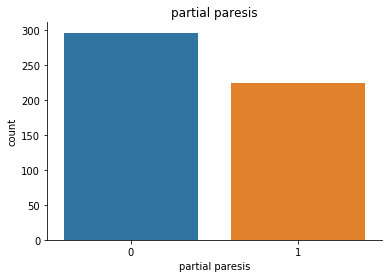

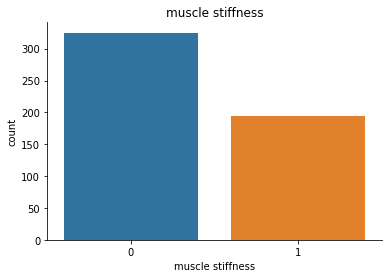

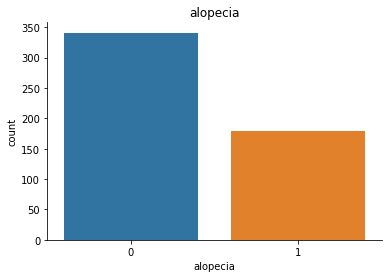

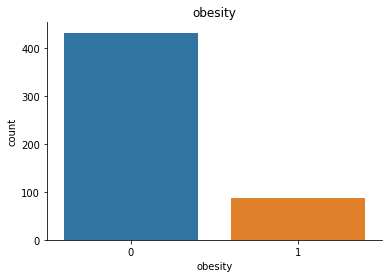

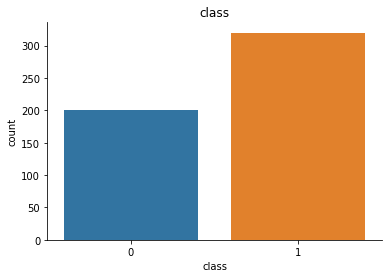

In [20]:
# We only start from the second column coz a count plot doesnt make sense with age
for x in df.columns[1:]:
    sns.countplot(df[x])
    plt.title(x)   
    sns.despine()
    plt.show()     # Have to add this so that the graph from that iteration is displayed


### Questions:
1. Is obesity related to diabetes status?
2. Is age releated to diabetes status?

In [21]:
# Remember that the class column indicates whether one is obese or not
# Now to solve the first question let us create a table using class and obesity

In [24]:
# We use crosstab to do so:

obesity_diabetes_crosstab = pd.crosstab(df["class"], df["obesity"])  
obesity_diabetes_crosstab
# Like at truth table but with obesity and diabetes instead

obesity,0,1
class,,
0,173,27
1,259,61


Now we can carry out manual calculations to gauge independence/dependence between the two variables- however we can also use one of the stats libraries we imported to do the same.

We can use chi2_contingency, which will give us:
1. The test statistic
2. The p-value of the test
3. Degrees of freedom
4. The expected frequencies, based on the marginal sums of the table

In [25]:
chi2_contingency(obesity_diabetes_crosstab)

(2.3274739583333344,
 0.12710799319896815,
 1,
 array([[166.15384615,  33.84615385],
        [265.84615385,  54.15384615]]))

In [ ]:
# The second value in the tuple helps us judge if there is dependency
# If the value < 0.05, the two variables are dependent
# The fourth value gives you the array if completelty independent 
# Therefore since p-value > 0.05, THERE IS NO DEPENDENCY 
# Obesity does not have an impact on diabetes
# This is backed up by how similar the expected frequency values are to the actualy values in the cross table

Therefore:
1. Is obesity related to diabetes status?
#### No

Before we move on to the next question, we can try the cross tab on all of the columns using a for loop

In [30]:
for x in df.columns[1:-1]:
    crosstab = pd.crosstab(df["class"], df[x])  
    print(chi2_contingency(crosstab))

(103.03685927972558, 3.289703730553317e-24, 1, array([[ 73.84615385, 126.15384615],
       [118.15384615, 201.84615385]]))
(227.86583895496773, 1.7409117803442155e-51, 1, array([[100.76923077,  99.23076923],
       [161.23076923, 158.76923077]]))
(216.17163269578742, 6.1870096408863144e-49, 1, array([[110.38461538,  89.61538462],
       [176.61538462, 143.38461538]]))
(97.29630347827408, 5.969166262549937e-23, 1, array([[116.53846154,  83.46153846],
       [186.46153846, 133.53846154]]))
(29.767918414029744, 4.869843446585542e-08, 1, array([[ 82.69230769, 117.30769231],
       [132.30769231, 187.69230769]]))
(59.59525353729631, 1.1651584346409174e-14, 1, array([[108.84615385,  91.15384615],
       [174.15384615, 145.84615385]]))
(5.792148557528164, 0.016097902991938178, 1, array([[155.38461538,  44.61538462],
       [248.61538462,  71.38461538]]))
(31.80845583287224, 1.7015036753241226e-08, 1, array([[110.38461538,  89.61538462],
       [176.61538462, 143.38461538]]))
(0.04623543692913

In [ ]:
# So this is how we can answer quesions like quesiton 1, where we are dealing
# with binary values

2. Is age releated to diabetes status?

Qn 2 however, deals with age now. Thus, we cannot use the method in qn 1 as we are no longer dealing with a variable that deals in binary values.

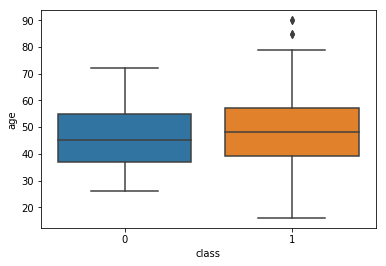

In [31]:
# Let us create a box plot first
sns.boxplot(df["class"],df["age"])

In [32]:
# So this is our visualisation of the data- now let us carry out some statistical inference

In [33]:
no_diabetes = df[df["class"] == 0]   # How to filter table
no_diabetes

,age,ismale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
200,40,1,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0
201,28,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
202,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
203,34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
204,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
205,67,1,1,0,0,1,1,0,1,1,1,1,0,1,1,1,0
206,60,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
207,58,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0
208,54,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0
209,43,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [35]:
# Now let us get the mean and median of this fitlered table
print(no_diabetes['age'].mean())
print(no_diabetes['age'].median())

46.36
45.0


In [36]:
# Let us do the same with diabetes
diabetes = df[df["class"] == 1] 
print(diabetes['age'].mean())
print(diabetes['age'].median())

49.071875
48.0


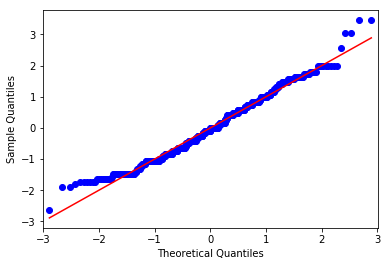

In [37]:
# Before we continue- let us judge if the data of the people we are working
# with is normally distributed in regards to their age
qqplot(df["age"], fit= True, line  = "s")
plt.show()

Is mostly normally distributed, with some slight skewing at the edges. Thus, we can carry out ztest on the data since it is approx. normally distributed.

In [38]:
# Conducting z test of difference:
ztest(diabetes["age"], no_diabetes["age"])
# The first value is the z-score and the second value is the p-value

(2.4882300316303065, 0.012838066562901769)

The test was checking if there is a significant difference between the two groups. Since p-value < 0.05, we can confidently say that there is indeed a difference between the age group of those with diabetes and those without it.

Looking back at our mean and median values for each group now- we can see that those with diabetes tend to be a few years older than those without.

In [ ]:
# Aite thats qn 2 done
# Now let us look at something q cool:

In [39]:
# Lets see the correlation between each column first
df.corr()   # This shows us the correlation between each of the columns

,age,ismale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
ismale,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


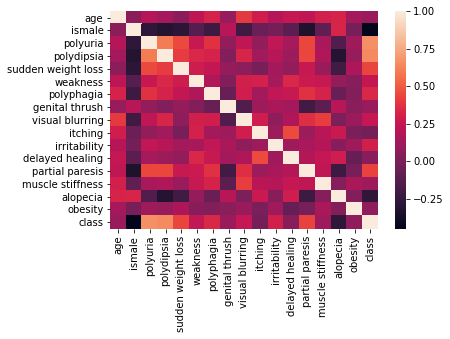

In [42]:
sns.heatmap(df.corr()) # A visual representation of the above data

Summary:
1. Looked at the single columns
2. Looked at the relationship between two columns
3. Conducted a statistical test of difference between ages on non-diabetic and diabetic patients
4. Plotted a correlation heatmap